In [1]:
from IPython.display import display, Math, Latex, HTML

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb
import os

In [2]:
#construct network of Monty Hall
m0 = gum.fastBN("X{A|B|C}->Z{A|B|C}<-Y{A|B|C}")

OneThird=1/3

m0.cpt("X")[:]=[OneThird, OneThird, OneThird]
m0.cpt("Y")[:]=[OneThird, OneThird, OneThird]

m0.cpt("Z")[{'X':'A','Y':'A'}]=[0,0.5,0.5]
m0.cpt("Z")[{'X':'B','Y':'B'}]=[0.5,0,0.5]
m0.cpt("Z")[{'X':'C','Y':'C'}]=[0.5,0.5,0] 
m0.cpt("Z")[{'X':'A','Y':'B'}]=[0,0,1]
m0.cpt("Z")[{'X':'A','Y':'C'}]=[0,1,0]
m0.cpt("Z")[{'X':'B','Y':'A'}]=[0,0,1] 
m0.cpt("Z")[{'X':'B','Y':'C'}]=[1,0,0]
m0.cpt("Z")[{'X':'C','Y':'A'}]=[0,1,0]
m0.cpt("Z")[{'X':'C','Y':'B'}]=[1,0,0]

#to draw network and cpt
gnb.sideBySide(m0,m0.cpt("X"),m0.cpt("Y"),m0.cpt("Z"))

In [3]:
#joint distribution in simple cases (we multiply each cpt - not convenient for big networks)
pXYZ=m0.cpt("X")*m0.cpt("Y")*m0.cpt("Z")
pXYZ

(gum::Potential<double>@0x22af47504b0) <Y:A|X:A|Z:A> :: 0 /<Y:B|X:A|Z:A> :: 0 /<Y:C|X:A|Z:A> :: 0 /<Y:A|X:B|Z:A> :: 0 /<Y:B|X:B|Z:A> :: 0.0555556 /<Y:C|X:B|Z:A> :: 0.111111 /<Y:A|X:C|Z:A> :: 0 /<Y:B|X:C|Z:A> :: 0.111111 /<Y:C|X:C|Z:A> :: 0.0555556 /<Y:A|X:A|Z:B> :: 0.0555556 /<Y:B|X:A|Z:B> :: 0 /<Y:C|X:A|Z:B> :: 0.111111 /<Y:A|X:B|Z:B> :: 0 /<Y:B|X:B|Z:B> :: 0 /<Y:C|X:B|Z:B> :: 0 /<Y:A|X:C|Z:B> :: 0.111111 /<Y:B|X:C|Z:B> :: 0 /<Y:C|X:C|Z:B> :: 0.0555556 /<Y:A|X:A|Z:C> :: 0.0555556 /<Y:B|X:A|Z:C> :: 0.111111 /<Y:C|X:A|Z:C> :: 0 /<Y:A|X:B|Z:C> :: 0.111111 /<Y:B|X:B|Z:C> :: 0.0555556 /<Y:C|X:B|Z:C> :: 0 /<Y:A|X:C|Z:C> :: 0 /<Y:B|X:C|Z:C> :: 0 /<Y:C|X:C|Z:C> :: 0

$$P(Y|X,Z)=\frac{P(X,Y,Z)}{P(X,Z)}=\frac{P(X,Y,Z)}{\sum_{Y}P(X,Y,Z)}$$

In [4]:
pYgivenXZ=(pXYZ/pXYZ.margSumOut(["Y"]))
pYgivenXZ.putFirst("Y")

(gum::Potential<double>@0x22af4750230) <Y:A|X:A|Z:A> :: nan /<Y:B|X:A|Z:A> :: nan /<Y:C|X:A|Z:A> :: nan /<Y:A|X:B|Z:A> :: 0 /<Y:B|X:B|Z:A> :: 0.333333 /<Y:C|X:B|Z:A> :: 0.666667 /<Y:A|X:C|Z:A> :: 0 /<Y:B|X:C|Z:A> :: 0.666667 /<Y:C|X:C|Z:A> :: 0.333333 /<Y:A|X:A|Z:B> :: 0.333333 /<Y:B|X:A|Z:B> :: 0 /<Y:C|X:A|Z:B> :: 0.666667 /<Y:A|X:B|Z:B> :: nan /<Y:B|X:B|Z:B> :: nan /<Y:C|X:B|Z:B> :: nan /<Y:A|X:C|Z:B> :: 0.666667 /<Y:B|X:C|Z:B> :: 0 /<Y:C|X:C|Z:B> :: 0.333333 /<Y:A|X:A|Z:C> :: 0.333333 /<Y:B|X:A|Z:C> :: 0.666667 /<Y:C|X:A|Z:C> :: 0 /<Y:A|X:B|Z:C> :: 0.666667 /<Y:B|X:B|Z:C> :: 0.333333 /<Y:C|X:B|Z:C> :: 0 /<Y:A|X:C|Z:C> :: nan /<Y:B|X:C|Z:C> :: nan /<Y:C|X:C|Z:C> :: nan

In [5]:
#construct network
m1 = gum.fastBN("S{y|n}->T{y|n}<-U{y|n}<-V{y|n}->Y{y|n}")

#show network with random cpts
gnb.sideBySide(m1)

G <!-- S --> S S <!-- T --> T T <!-- S->T --> S->T <!-- U --> U U <!-- U->T --> U->T <!-- V --> V V <!-- V->U --> V->U <!-- Y --> Y Y <!-- V->Y --> V->Y


In [6]:
#in some cases you must divide network construction (for example if you want to add an arc S->Z)
m2 = gum.fastBN("S{y|n}->T{y|n}<-U{y|n}<-V{y|n}->Y{y|n};S->Z{y|n}") 
#show network with random cpts
gnb.sideBySide(m2)

G <!-- S --> S S <!-- T --> T T <!-- S->T --> S->T <!-- Z --> Z Z <!-- S->Z --> S->Z <!-- U --> U U <!-- U->T --> U->T <!-- V --> V V <!-- V->U --> V->U <!-- Y --> Y Y <!-- V->Y --> V->Y


In [7]:
#add cpts to the graph (you can decide to specify them or not (or specify only some of them). 
#The other will be initialized randomly)

m2.cpt("V")[:]=[0.4,0.6]
m2.cpt("S")[:]=[0.5,0.5]
m2.cpt("U")[:]=[[0.1,0.9],  #V=y
                [0.7,0.3]]  #V=n
m2.cpt("T")[{'S':'y','U':'y'}]=[0.31,0.69] 
m2.cpt("T")[{'S':'y','U':'n'}]=[0.13,0.87] 
m2.cpt("T")[{'S':'n','U':'y'}]=[0.27,0.73]
m2.cpt("T")[{'S':'n','U':'n'}]=[0.07,0.93] 
#show network with cpts
gnb.sideBySide(m2,m2.cpt("V"), m2.cpt("S"),m2.cpt("U"), m2.cpt("Y"), m2.cpt("Z"), m2.cpt("T"))

In [36]:
#check arcs
m2.arcs() #you can find id of variables with idFromName

{(0, 1), (0, 5), (2, 1), (3, 2), (3, 4)}

In [37]:
#check cpt of a variable
m2.cpt("V")

(gum::Potential<double>@0x1afb11c1980) <V:y> :: 0.4 /<V:n> :: 0.6

In [38]:
#erease an arc from the network
m2.eraseArc("V","Y")
#show network with cpts
gnb.sideBySide(m2,m2.cpt("V"), m2.cpt("S"),m2.cpt("U"), m2.cpt("Y"), m2.cpt("Z"), m2.cpt("T"))

In [39]:
#erease a variable from the network
m2.erase("Y")
#show network
gnb.sideBySide(m2)

G <!-- S --> S S <!-- T --> T T <!-- S->T --> S->T <!-- Z --> Z Z <!-- S->Z --> S->Z <!-- U --> U U <!-- U->T --> U->T <!-- V --> V V <!-- V->U --> V->U


In [40]:
#get posteriors
gnb.sideBySide(m2,gnb.getInference(m2)) 

G <!-- S --> S S <!-- T --> T T <!-- S->T --> S->T <!-- Z --> Z Z <!-- S->Z --> S->Z <!-- U --> U U <!-- U->T --> U->T <!-- V --> V V <!-- V->U --> V->U


In [43]:
#get joint posteriors in general cases
ie=gum.LazyPropagation(m2) #put the network in a new form adapted for inference (the process that consists in computing 
# new probabilistc information from a network and some evidences)
ie.addJointTarget({"Z","T","V"}) #add targets of the calculus
ie.makeInference() #perform the computations needed to compute the posteriors 
# (i.e. after all evidences are taken into account)
gnb.sideBySide(ie.jointPosterior({"Z","T","V"}),ie.jointPosterior({"Z","T"}),
               captions=["Joint posterior $P(Z,T,V)$","Joint posterior $P(Z,T)$"])

In [44]:
ie.addJointTarget({"S","U", "Z", "T", "V"}) #update targets
ie.makeInference()
gnb.sideBySide(ie.evidenceJointImpact(["S","U"],["Z","T"]),ie.evidenceJointImpact(["S","U"],["Z","T","V"]),
              captions=["$\\forall Z,T, P(S,U|Z,T)$",
                        "$\\forall Z,T,V, P(S,U|Z,T,V)$"]
                        )

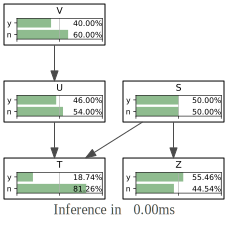

In [45]:
#inference in the whole bayesian network
gnb.showInference(m2)

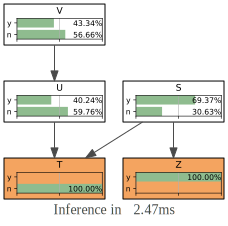

In [46]:
#inference in the whole bayesian network with evidence
gnb.showInference(m2,evs={'Z':'y','T':'n'})